In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
#train_test_split splits arrays or matrices into random train and test subsets.
#That means that everytime you run it without specifying random_state, you will get a different result.
#if you want to use same result you should random_state=number
rand_state = 1000

In [3]:
df = pd.read_csv("bikeshare.csv")
df.head()

,season,yr,mnth,hr,holiday,weekday,notbizday,weathersit,temp,hum,windspeed,dteday,cnt
0,1,0,1,0,0,6,1,1,-1.335,0.947,-1.554,2011-01-01,16
1,1,0,1,1,0,6,1,1,-1.438,0.896,-1.554,2011-01-01,40
2,1,0,1,2,0,6,1,1,-1.438,0.896,-1.554,2011-01-01,32
3,1,0,1,3,0,6,1,1,-1.335,0.636,-1.554,2011-01-01,13
4,1,0,1,4,0,6,1,1,-1.335,0.636,-1.554,2011-01-01,1


In [4]:
df.isna().sum()  

season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
notbizday     0
weathersit    0
temp          0
hum           0
windspeed     0
dteday        0
cnt           0
dtype: int64

In [5]:
df.shape

(17379, 13)

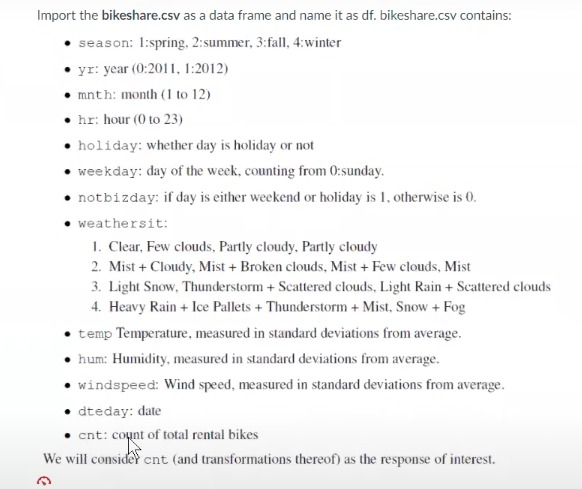

## Exploratory Data Analysis and Visualization

In [6]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   notbizday   17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   hum         17379 non-null  float64
 10  windspeed   17379 non-null  float64
 11  dteday      17379 non-null  object 
 12  cnt         17379 non-null  int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 1.7+ MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,17379.000,2.502,1.107,1.000,2.000,3.000,3.000,4.000
yr,17379.000,0.503,0.500,0.000,0.000,1.000,1.000,1.000
mnth,17379.000,6.538,3.439,1.000,4.000,7.000,10.000,12.000
hr,17379.000,11.547,6.914,0.000,6.000,12.000,18.000,23.000
holiday,17379.000,0.029,0.167,0.000,0.000,0.000,0.000,1.000
weekday,17379.000,3.004,2.006,0.000,1.000,3.000,5.000,6.000
notbizday,17379.000,0.317,0.465,0.000,0.000,0.000,1.000,1.000
weathersit,17379.000,1.425,0.639,1.000,1.000,1.000,2.000,4.000
temp,17379.000,0.000,1.000,-2.477,-0.815,0.016,0.847,2.612
hum,17379.000,0.000,1.000,-3.251,-0.763,0.014,0.792,1.932


The managers of Capital Bikeshare have found that the system works smoothly until more than 500 bikes are rented in any one hour. At that point, it becomes necessary to insert extra bikes into the system and move them across stations to balance loads.

In [6]:
#target label
#cnt sütunü 500den büyük ise 1, değil ise 0 yazdırır....
overload = np.where(df['cnt']>500,1,0)
overload

array([0, 0, 0, ..., 0, 0, 0])

In [7]:
df['overload']=overload
df.drop('cnt', axis=1, inplace=True)
df.columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'notbizday',
       'weathersit', 'temp', 'hum', 'windspeed', 'dteday', 'overload'],
      dtype='object')

In [8]:
df.overload.value_counts()
#the dataset is relatively imbalanced

0    16100
1     1279
Name: overload, dtype: int64

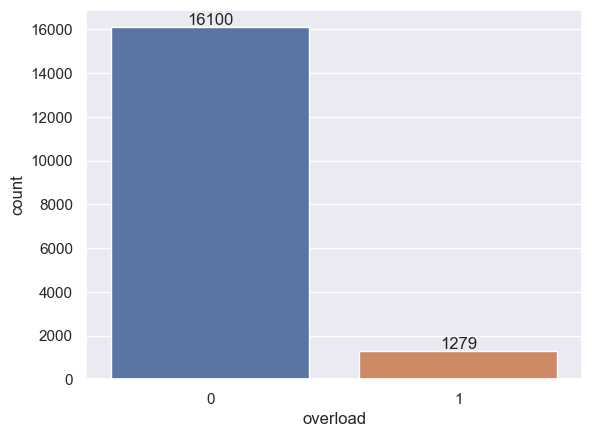

In [9]:
ax = sns.countplot(df.overload)
ax.bar_label(ax.containers[0]);

In [10]:
df.drop('dteday',axis=1, inplace=True)

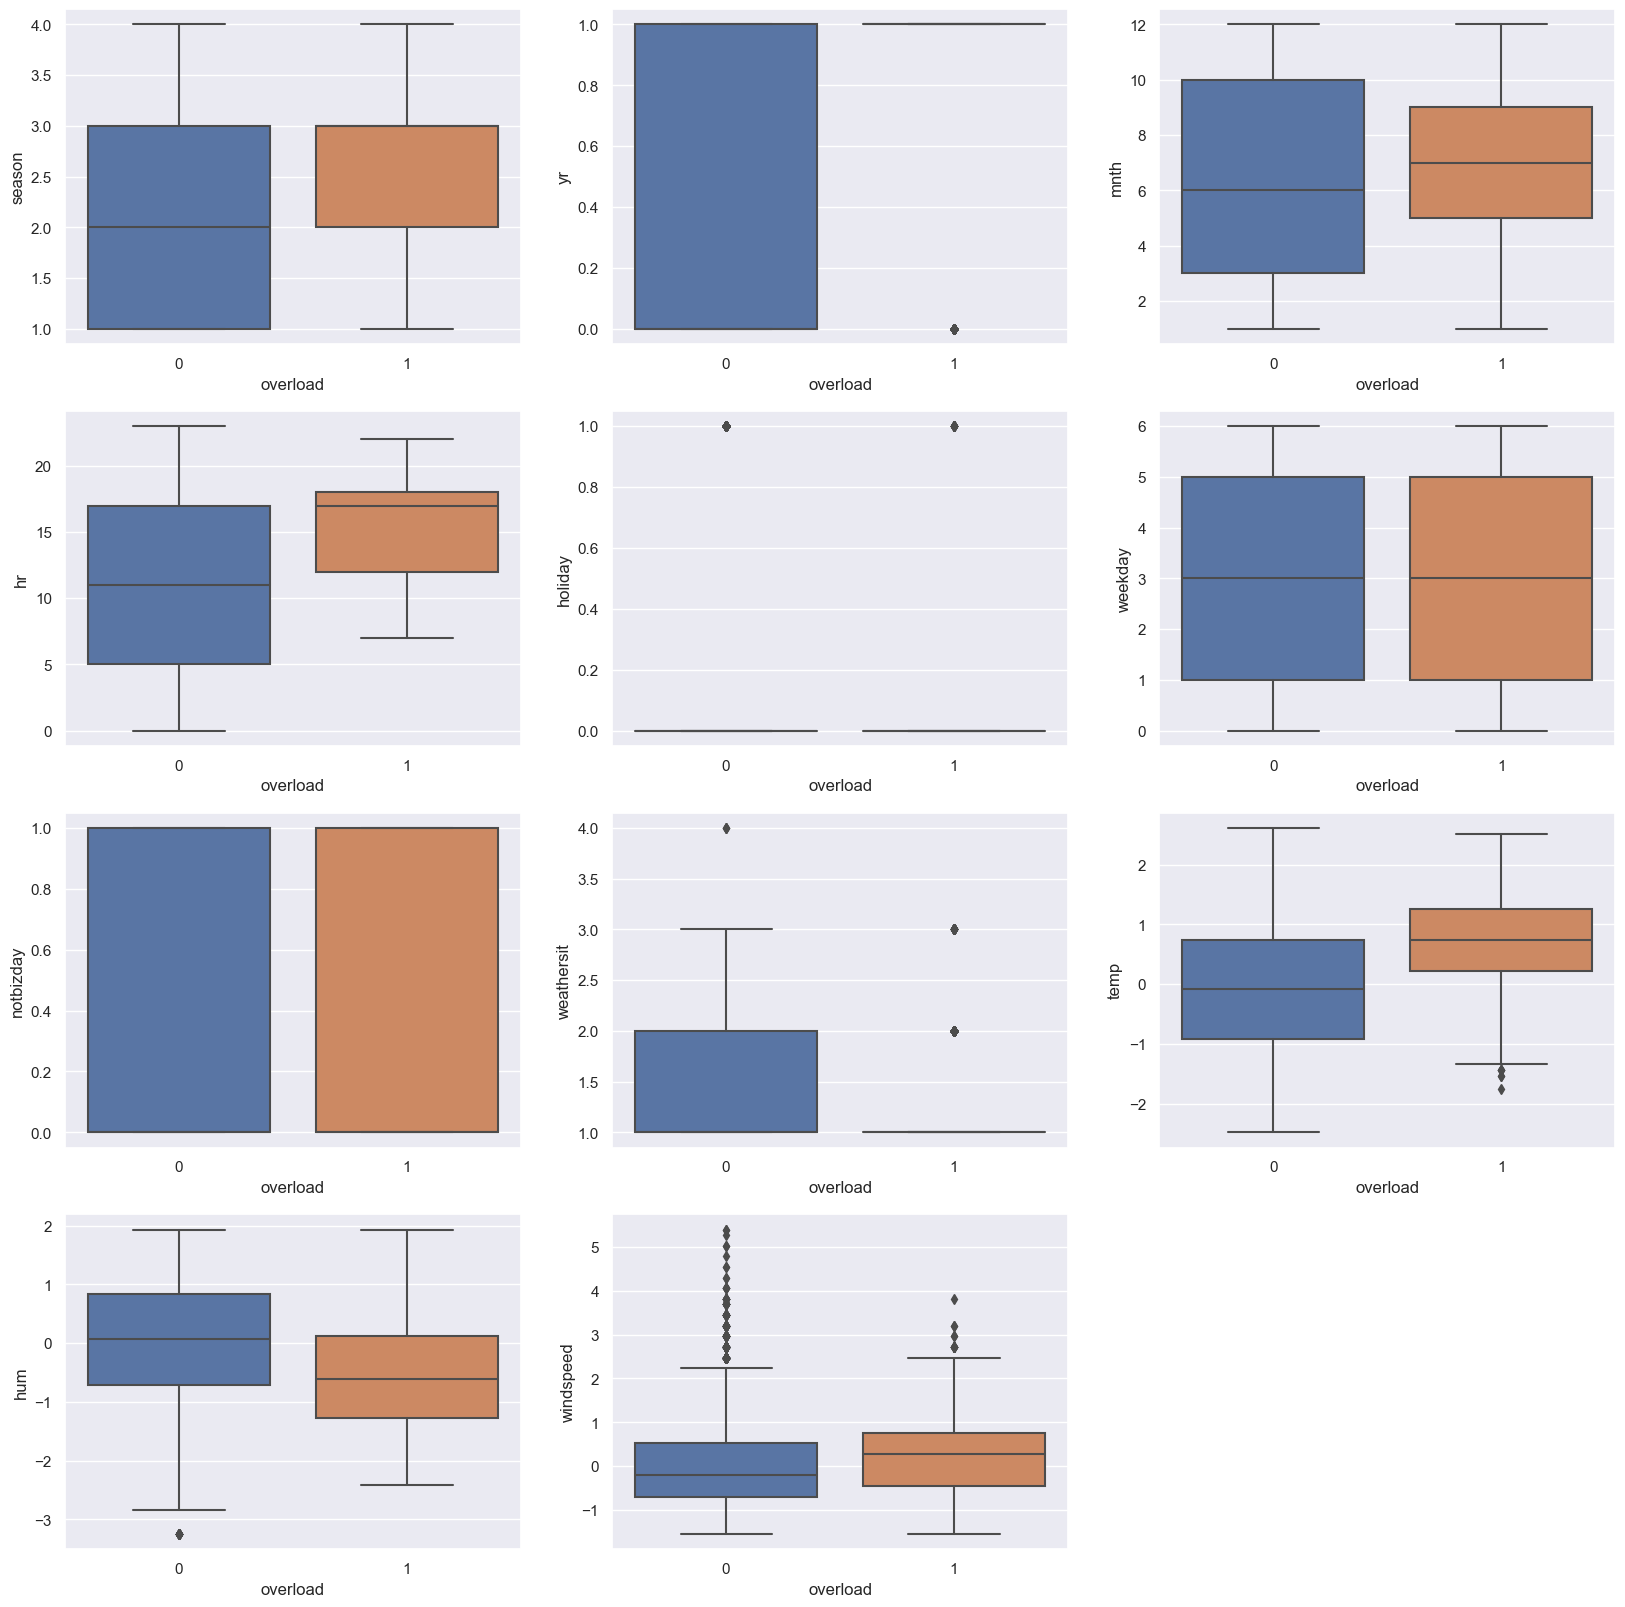

In [11]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "overload":
        index += 1
        plt.subplot(4,3,index)
        sns.boxplot(x='overload',y=feature,data=df)

<AxesSubplot:>

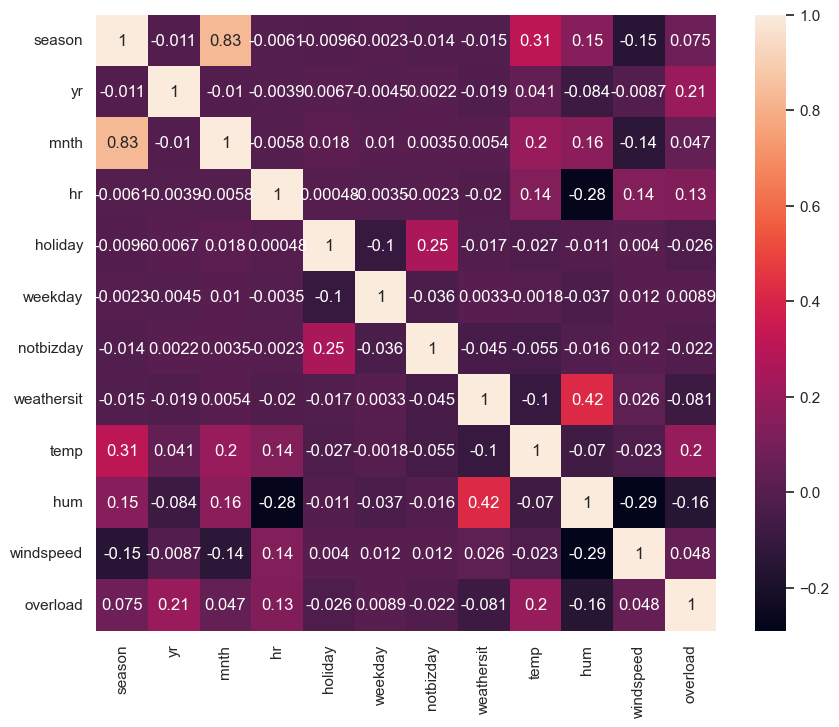

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

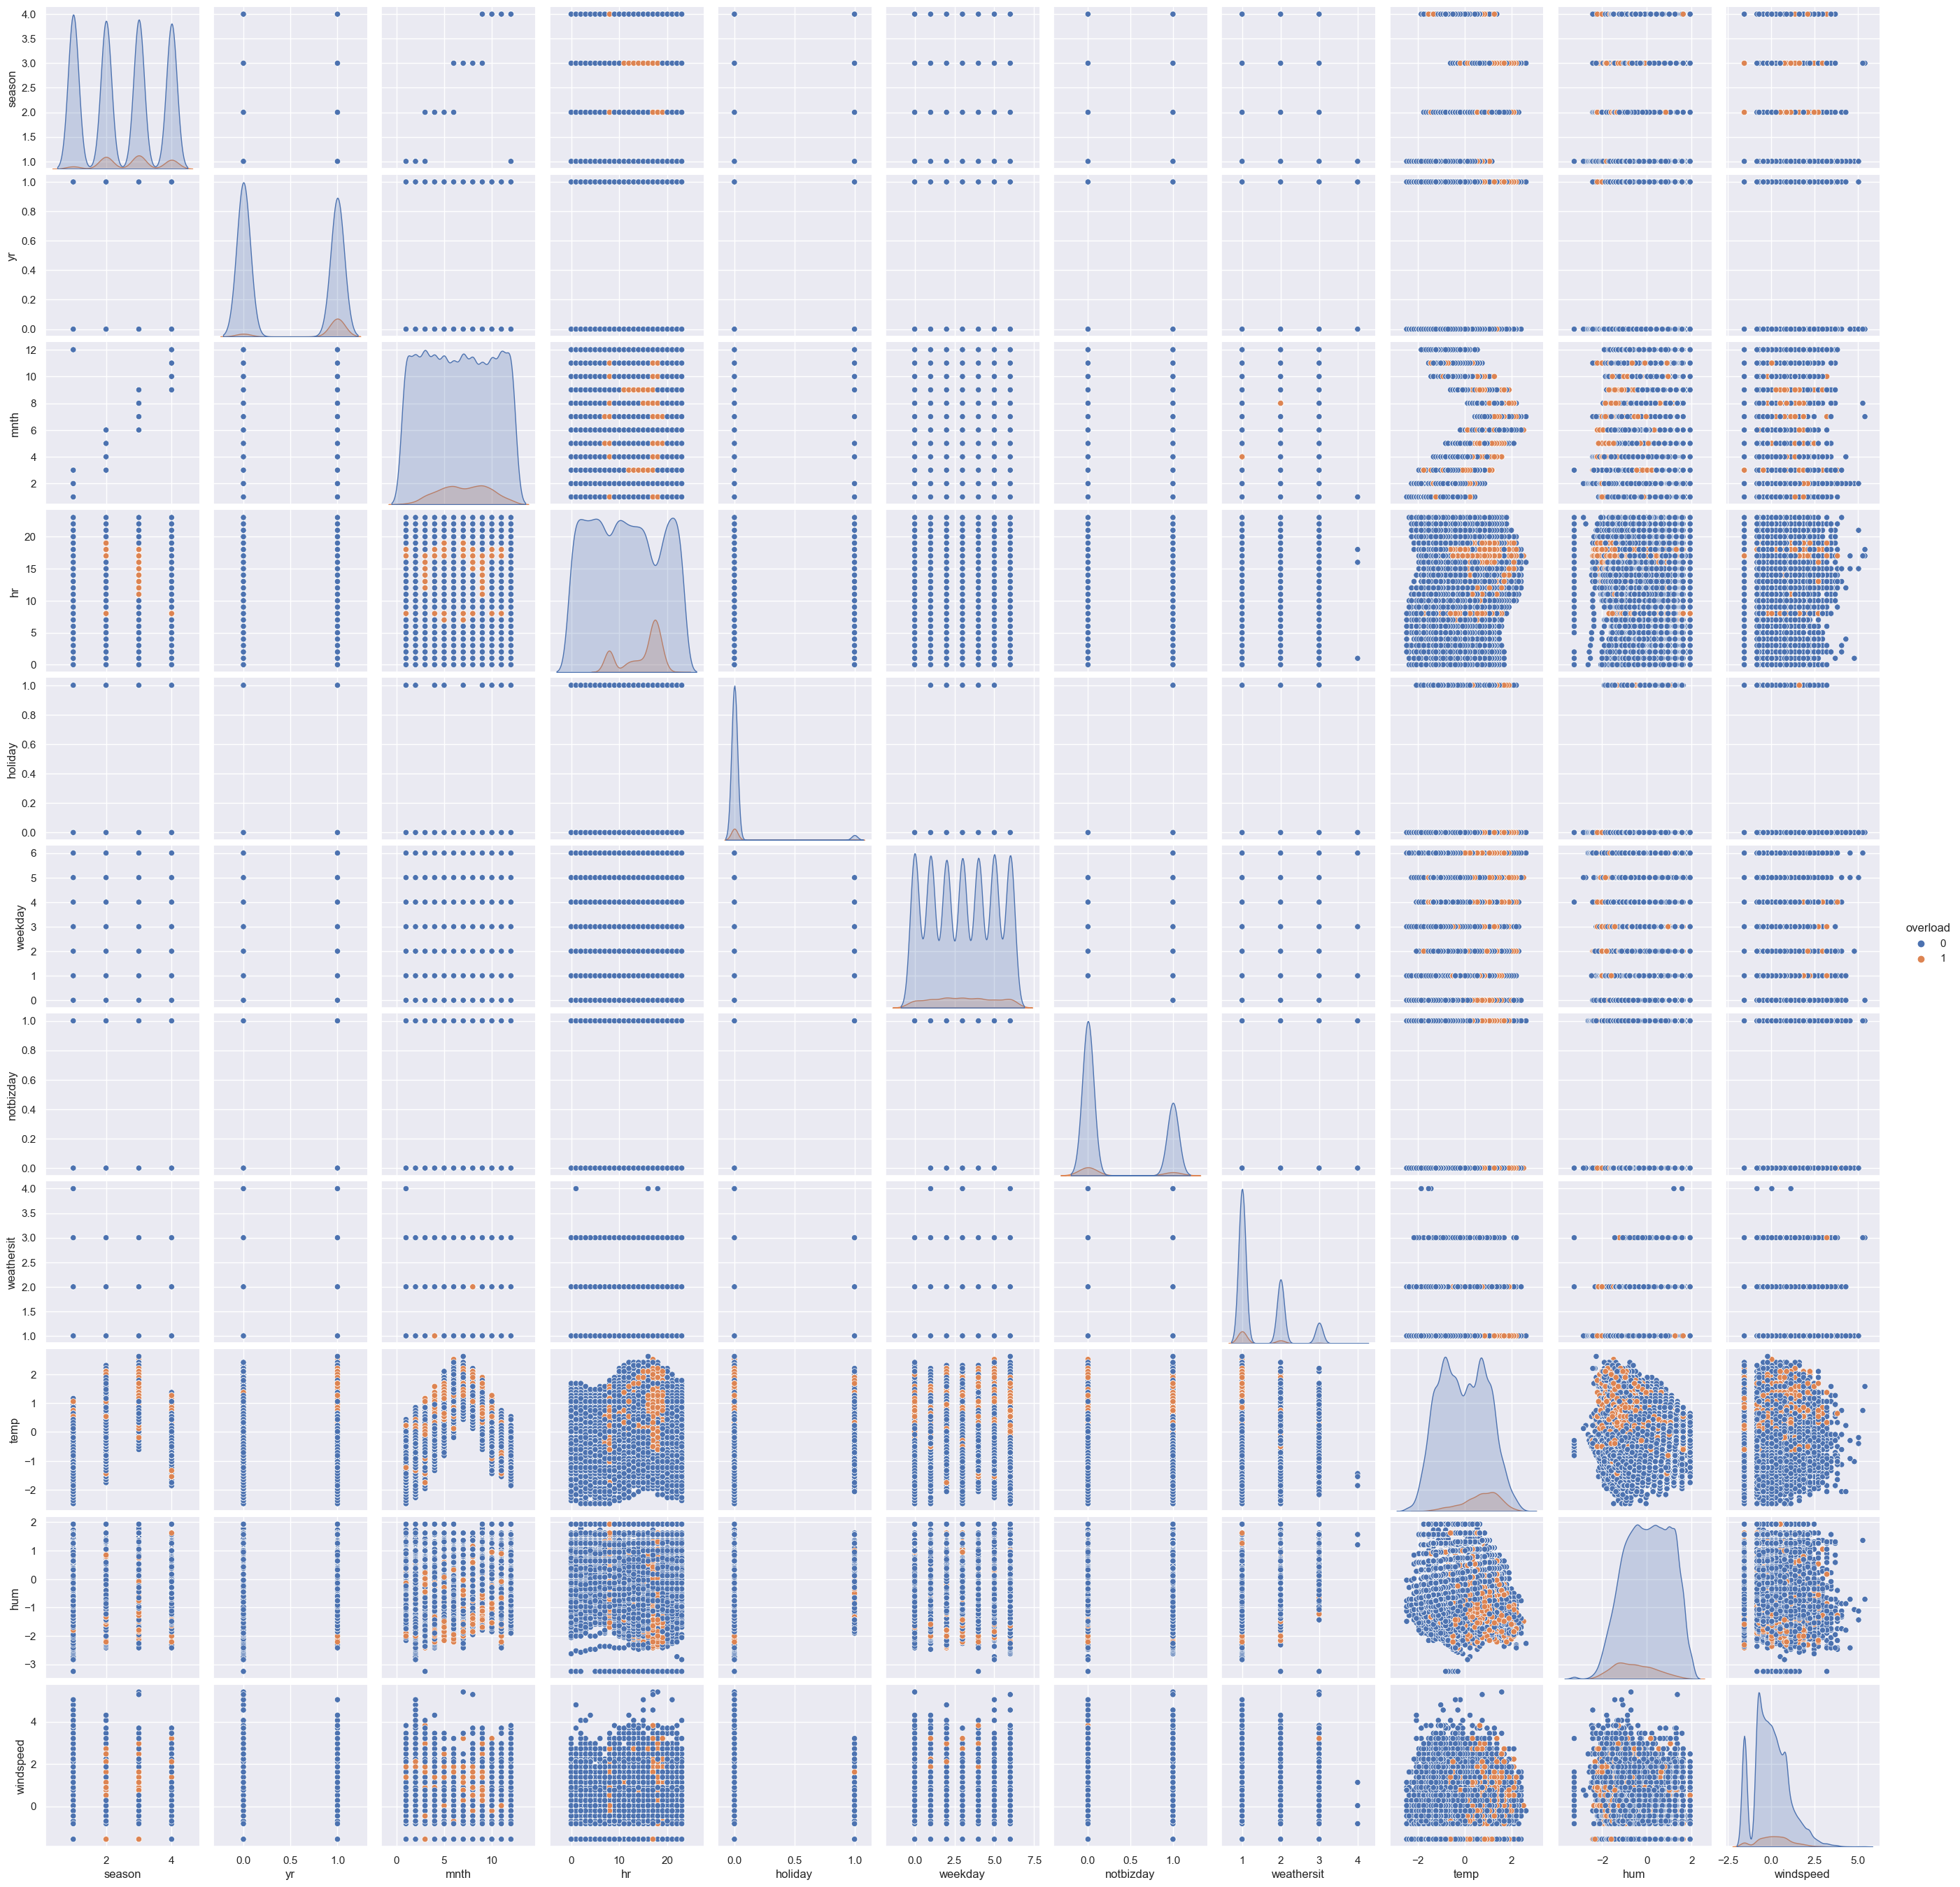

In [15]:
sns.pairplot(df, hue = "overload")

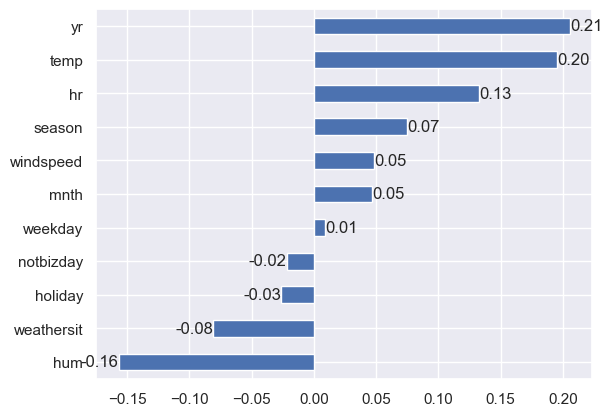

In [16]:
ax = df.corr()["overload"].drop("overload").sort_values().plot.barh()
ax.bar_label(ax.containers[0], fmt="%.2f");

## Train | Test Split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X=df.drop(["overload"], axis=1)
y=df["overload"]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=rand_state)
#stratify=y kullanmamızın sebebi imbalanced olduğu için train ve testte eşit dağılımı sağlaması

In [16]:
y_test.value_counts(normalize=True)
#oranlar aynı.. stratifydan dolayı

0   0.926
1   0.074
Name: overload, dtype: float64

In [17]:
y_train.value_counts(normalize=True)

0   0.926
1   0.074
Name: overload, dtype: float64

## Modelling and Model Performance

In [18]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

In [19]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [20]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.pipeline import Pipeline

In [21]:
operations = [("scaler", StandardScaler()), ("SVC", SVC())]
pipe_model = Pipeline(steps=operations)

# Şimdi scale yaparak scorları gözlemleyelim.

In [22]:
pipe_model.fit(X_train, y_train)
eval_metric(pipe_model, X_train, y_train, X_test, y_test)


Test_Set
[[4823    7]
 [ 349   35]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      4830
           1       0.83      0.09      0.16       384

    accuracy                           0.93      5214
   macro avg       0.88      0.54      0.56      5214
weighted avg       0.93      0.93      0.91      5214


Train_Set
[[11256    14]
 [  811    84]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     11270
           1       0.86      0.09      0.17       895

    accuracy                           0.93     12165
   macro avg       0.89      0.55      0.57     12165
weighted avg       0.93      0.93      0.91     12165



In [24]:
from sklearn.model_selection import cross_validate

operations = [("scaler", StandardScaler()), ("SVC", SVC())]
pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model, X_train, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10,
                       return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]


test_accuracy     0.930
train_accuracy    0.932
test_precision    0.788
train_precision   0.871
test_recall       0.074
train_recall      0.088
test_f1           0.134
train_f1          0.160
dtype: float64

### With Best Parameters (GridsearchCV)

### Gridsearch
Finding the right hyper parameters (like C, gamma and the Kernel function) is a tricky task! But luckily, we can be a little lazy and just try a bunch of combinations and see what works best! This idea of creating a 'grid' of parameters and just trying out all the possible combinations is called a Gridsearch, this method is common enough that Scikit-learn has this functionality built in with GridSearchCV! The CV stands for cross-validation.

GridSearchCV takes a dictionary that describes the parameters that should be tried and a model to train. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested.

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
param_grid = {'SVC__C': [ 10,100,1000],#c büyürse overfit olur
              'SVC__gamma': ["scale",0.01,0.001],
              'SVC__kernel': ['rbf' ],#rbf default değer
              'SVC__class_weight': ["balanced"]}#balanced hale gelince iyileşme olacak  mı bakacagız

In [27]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(probability=True))]#svc probabalty kullanılmaz. o yuzden true yaparak kullanmasını sağladık.
pipe_model = Pipeline(steps=operations)

svm_model_grid = GridSearchCV(pipe_model, 
                              param_grid,
                              scoring="recall",
                              cv=10, 
                              n_jobs =-1,
                              return_train_score=True)

In [28]:
svm_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVC', SVC(probability=True))]),
             n_jobs=-1,
             param_grid={'SVC__C': [10, 100, 1000],
                         'SVC__class_weight': ['balanced'],
                         'SVC__gamma': ['scale', 0.01, 0.001],
                         'SVC__kernel': ['rbf']},
             return_train_score=True, scoring='recall')

In [29]:
svm_model_grid.best_params_

{'SVC__C': 100,
 'SVC__class_weight': 'balanced',
 'SVC__gamma': 0.01,
 'SVC__kernel': 'rbf'}

In [30]:
svm_model_grid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('SVC',
                 SVC(C=100, class_weight='balanced', gamma=0.01,
                     probability=True))])

In [31]:
svm_model_grid.best_index_

4

In [32]:
pd.DataFrame(svm_model_grid.cv_results_).loc[4, ["mean_test_score", "mean_train_score"]]

mean_test_score    0.941
mean_train_score   0.971
Name: 4, dtype: object

In [33]:
svm_model_grid.best_score_

0.9408364544319602

In [34]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[3792 1038]
 [  19  365]]
              precision    recall  f1-score   support

           0       1.00      0.79      0.88      4830
           1       0.26      0.95      0.41       384

    accuracy                           0.80      5214
   macro avg       0.63      0.87      0.64      5214
weighted avg       0.94      0.80      0.84      5214


Train_Set
[[8900 2370]
 [  25  870]]
              precision    recall  f1-score   support

           0       1.00      0.79      0.88     11270
           1       0.27      0.97      0.42       895

    accuracy                           0.80     12165
   macro avg       0.63      0.88      0.65     12165
weighted avg       0.94      0.80      0.85     12165



In [35]:
operations = [("scaler", StandardScaler()), ("SVC", SVC(C= 100, gamma= 0.01, kernel= 'rbf', probability=True, 
                                                        class_weight="balanced"))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall','f1'], cv = 10,
                       return_train_score=True)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]


test_accuracy     0.798
train_accuracy    0.802
test_precision    0.260
train_precision   0.268
test_recall       0.941
train_recall      0.971
test_f1           0.408
train_f1          0.420
dtype: float64